In [1]:
from google.colab import files
uploaded = files.upload()

Saving Global_AI_Content_Impact_Dataset.csv to Global_AI_Content_Impact_Dataset.csv


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
import tensorflow as tf

In [10]:
from tensorflow import keras

In [11]:
from tensorflow.keras import layers

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
#Simulating the Dataset
import numpy as np

num_samples = 100  # Example: pick 100 random years
years = np.random.choice([2020, 2021, 2022, 2023, 2024, 2025], num_samples)
print(years)


[2023 2024 2022 2024 2024 2021 2022 2022 2022 2024 2023 2022 2025 2024
 2021 2023 2025 2025 2021 2023 2024 2020 2023 2021 2025 2024 2023 2020
 2020 2022 2022 2021 2023 2023 2025 2025 2025 2022 2023 2023 2020 2022
 2024 2022 2024 2020 2021 2023 2020 2023 2025 2021 2021 2020 2021 2024
 2021 2023 2023 2023 2023 2024 2022 2025 2020 2023 2021 2023 2021 2025
 2025 2025 2021 2023 2025 2024 2021 2021 2023 2021 2021 2025 2023 2025
 2025 2023 2020 2025 2024 2024 2021 2024 2021 2020 2023 2023 2023 2024
 2020 2024]


In [16]:
num_samples = 5000

In [17]:
ai_adoption = np.random.normal(loc=0.3 + (years-2020)*0.15, scale=0.1)

In [18]:
content_volume = np.random.poisson(lam=100 + (years-2020)*50)

In [19]:
engagement = np.random.normal(loc=0.2 + (years-2020)*0.05, scale=0.05)

In [20]:
personalization = np.random.normal(loc=0.1 + (years-2020)*0.1, scale=0.08)

In [21]:
revenue = np.random.normal(loc=50000 + (years-2020)*15000, scale=10000)

In [23]:
num_samples = 100  # Match all data lengths

impact_level = (
    ai_adoption*2 +
    engagement*3 +
    personalization*4 +
    np.random.normal(0, 0.2, num_samples)
).astype(int)


In [24]:
impact_level = np.clip(impact_level, 0, 2)

In [25]:
data = pd.DataFrame({
    'Year': years,
    'AI_Adoption_Rate': ai_adoption,
    'Content_Volume': content_volume,
    'Engagement_Rate': engagement,
    'Personalization_Score': personalization,
    'Revenue': revenue,
    'Impact_Level': impact_level
})

In [26]:
print(data.head())

   Year  AI_Adoption_Rate  Content_Volume  Engagement_Rate  \
0  2023          0.808212             237         0.380692   
1  2024          0.988775             326         0.467894   
2  2022          0.689433             205         0.278335   
3  2024          0.975500             292         0.410191   
4  2024          0.879283             326         0.427955   

   Personalization_Score        Revenue  Impact_Level  
0               0.377489   83608.582714             2  
1               0.366825  112677.426657             2  
2               0.299504  107837.774235             2  
3               0.532250   93889.943900             2  
4               0.589814  108514.485950             2  


In [27]:
#Exploratory Data Analysis (EDA)

In [28]:
print("\nBasic Statistics:")


Basic Statistics:


In [29]:
print(data.describe())

              Year  AI_Adoption_Rate  Content_Volume  Engagement_Rate  \
count   100.000000        100.000000      100.000000       100.000000   
mean   2022.690000          0.712527      235.400000         0.343669   
std       1.624901          0.281274       82.997627         0.095636   
min    2020.000000          0.097769       83.000000         0.091457   
25%    2021.000000          0.468043      158.750000         0.274197   
50%    2023.000000          0.717706      241.500000         0.340657   
75%    2024.000000          0.930997      303.000000         0.424864   
max    2025.000000          1.237230      381.000000         0.527069   

       Personalization_Score        Revenue  Impact_Level  
count             100.000000     100.000000    100.000000  
mean                0.356564   91345.578461      1.840000  
std                 0.196236   24443.367604      0.443129  
min                -0.082624   36585.548422      0.000000  
25%                 0.201606   72863.37609

In [30]:
print("\nMissing Values:")


Missing Values:


In [31]:
print(data.isnull().sum())

Year                     0
AI_Adoption_Rate         0
Content_Volume           0
Engagement_Rate          0
Personalization_Score    0
Revenue                  0
Impact_Level             0
dtype: int64


In [32]:
#Histograms

In [33]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

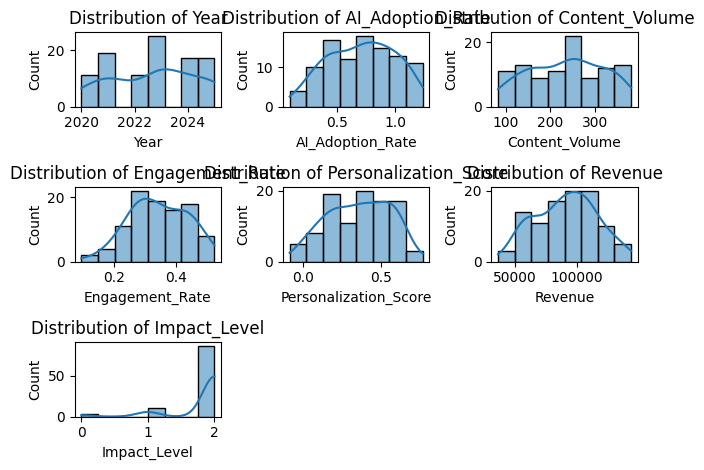

In [34]:
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [35]:
#Pairplots

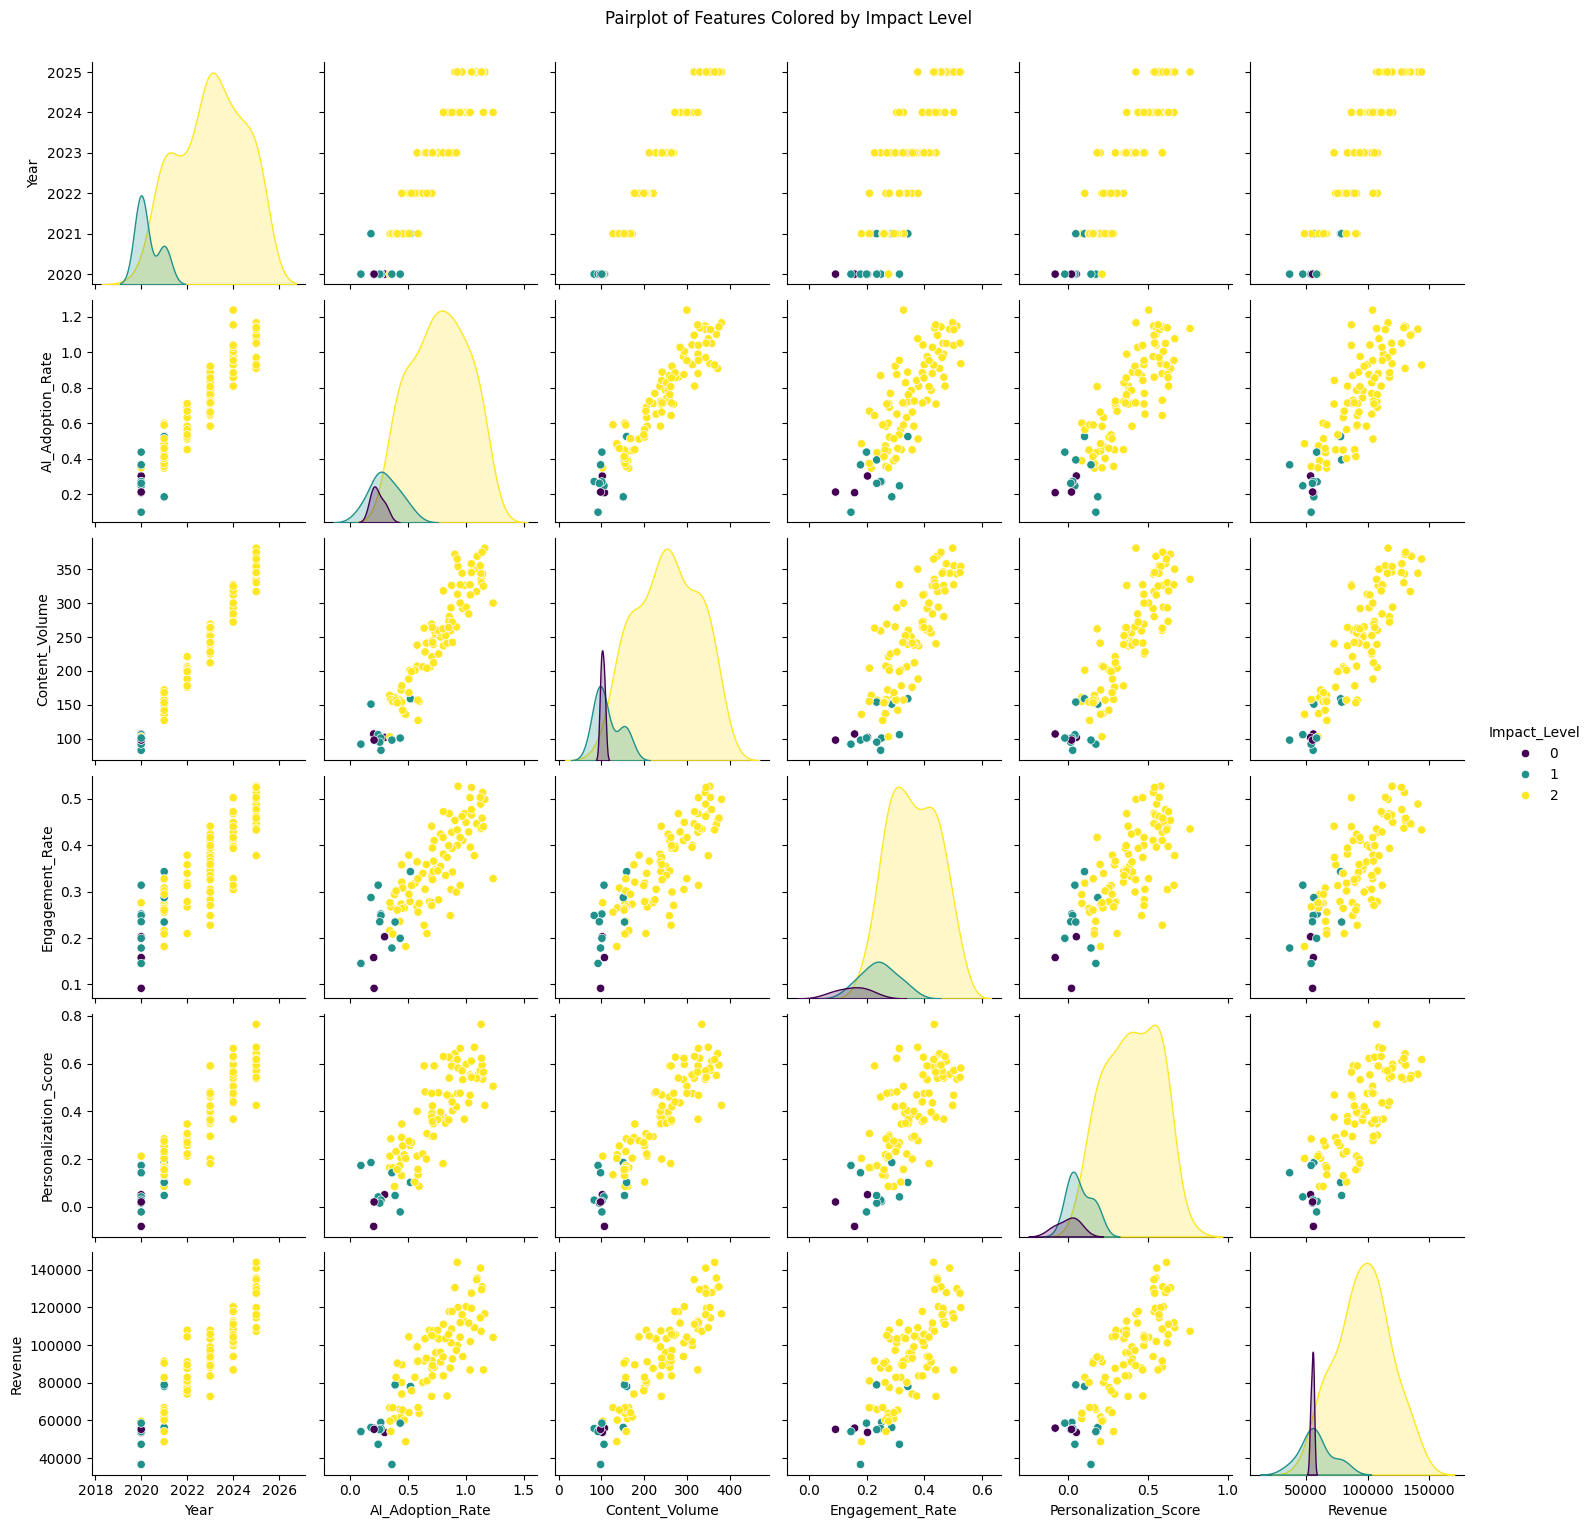

In [36]:
sns.pairplot(data, hue='Impact_Level', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Impact Level', y=1.02)
plt.show()

In [37]:
#Heatmap (Correlation Matrix)

In [38]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [39]:
corr = data.corr()

<Axes: >

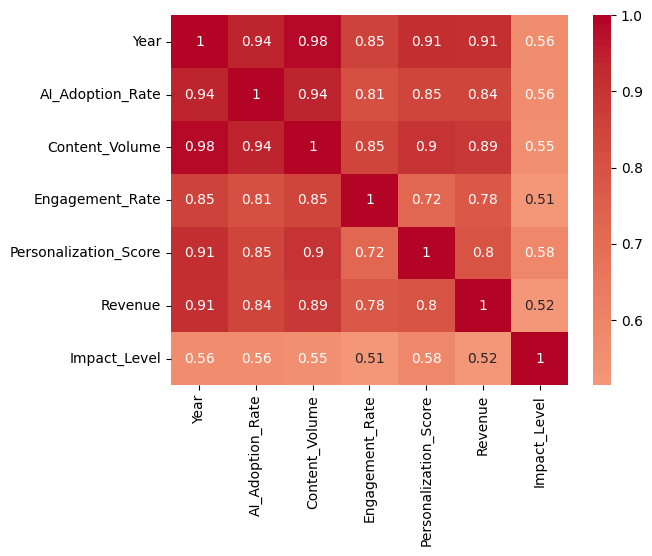

In [40]:
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

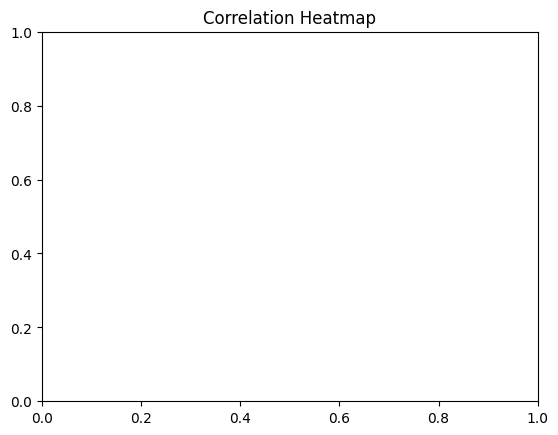

In [41]:
plt.title('Correlation Heatmap')
plt.show()

In [42]:
#Impact Level Distribution by Year

In [43]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='count'>

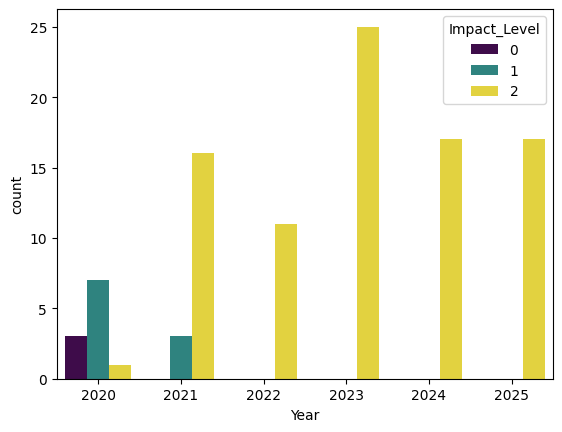

In [44]:
sns.countplot(x='Year', hue='Impact_Level', data=data, palette='viridis')

Text(0.5, 1.0, 'Distribution of Impact Levels Over Years')

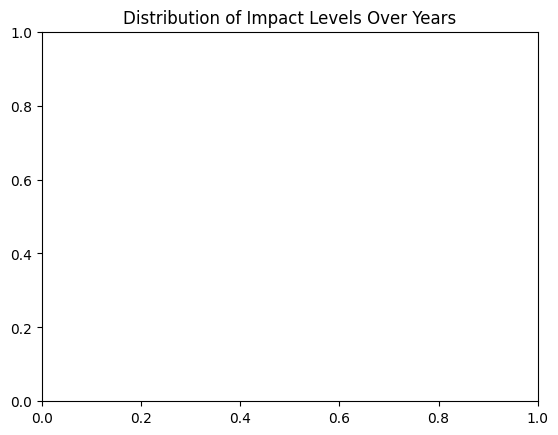

In [45]:
plt.title('Distribution of Impact Levels Over Years')

In [46]:
plt.show()

In [47]:
data['Year'] = data['Year'].astype('category')

In [48]:
data = pd.get_dummies(data, columns=['Year'], prefix='Year')

In [49]:
print("\nData after encoding:")


Data after encoding:


In [50]:
print(data.head())

   AI_Adoption_Rate  Content_Volume  Engagement_Rate  Personalization_Score  \
0          0.808212             237         0.380692               0.377489   
1          0.988775             326         0.467894               0.366825   
2          0.689433             205         0.278335               0.299504   
3          0.975500             292         0.410191               0.532250   
4          0.879283             326         0.427955               0.589814   

         Revenue  Impact_Level  Year_2020  Year_2021  Year_2022  Year_2023  \
0   83608.582714             2      False      False      False       True   
1  112677.426657             2      False      False      False      False   
2  107837.774235             2      False      False       True      False   
3   93889.943900             2      False      False      False      False   
4  108514.485950             2      False      False      False      False   

   Year_2024  Year_2025  
0      False      False  
1   

In [51]:
#Feature Scaling

In [52]:
scaler = StandardScaler()

In [53]:
numerical_features = ['AI_Adoption_Rate', 'Content_Volume', 'Engagement_Rate',
                     'Personalization_Score', 'Revenue']

In [54]:
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [55]:
print("\nData after scaling:")


Data after scaling:


In [56]:
print(data.head())

   AI_Adoption_Rate  Content_Volume  Engagement_Rate  Personalization_Score  \
0          0.341898        0.019375         0.389077               0.107168   
1          0.987078        1.097097         1.305486               0.052549   
2         -0.082519       -0.368121        -0.686599              -0.292239   
3          0.939644        0.685383         0.699084               0.899787   
4          0.595847        1.097097         0.885770               1.194609   

    Revenue  Impact_Level  Year_2020  Year_2021  Year_2022  Year_2023  \
0 -0.318122             2      False      False      False       True   
1  0.877101             2      False      False      False      False   
2  0.678110             2      False      False       True      False   
3  0.104617             2      False      False      False      False   
4  0.705934             2      False      False      False      False   

   Year_2024  Year_2025  
0      False      False  
1       True      False  
2      F

In [57]:
#Train-Test Split

In [58]:
X = data.drop('Impact_Level', axis=1)
y = data['Impact_Level']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (80, 11)
Test set shape: (20, 11)


In [61]:
#Model

In [62]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,811 (14.89 KB)

 Trainable params: 3,619 (14.14 KB)

 Non-trainable params: 192 (768.00 B)

In [65]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [66]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.6469 - loss: 0.8967 - val_accuracy: 0.8500 - val_loss: 0.8447
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6734 - loss: 0.7506 - val_accuracy: 0.8500 - val_loss: 0.8363
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7539 - loss: 0.6988 - val_accuracy: 0.9000 - val_loss: 0.8298
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7797 - loss: 0.6502 - val_accuracy: 0.9000 - val_loss: 0.8247
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7961 - loss: 0.5836 - val_accuracy: 0.9000 - val_loss: 0.8165
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8391 - loss: 0.5376 - val_accuracy: 0.9000 - val_loss: 0.8085
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7984 - loss: 0.5738 - val_accuracy: 0.9000 - val_loss: 0.8014
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8469 - loss: 0.4569 - val_accuracy: 0.9000 - val_loss

In [67]:
#Training History Visualization

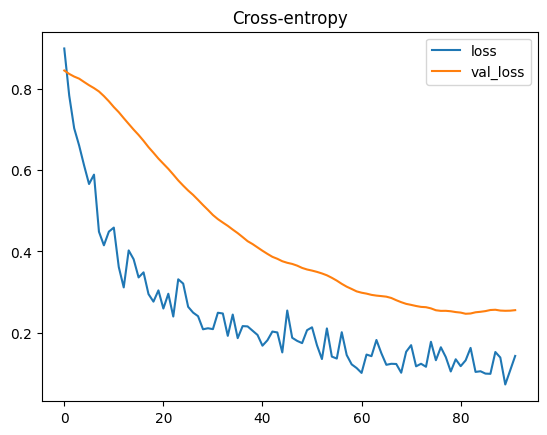

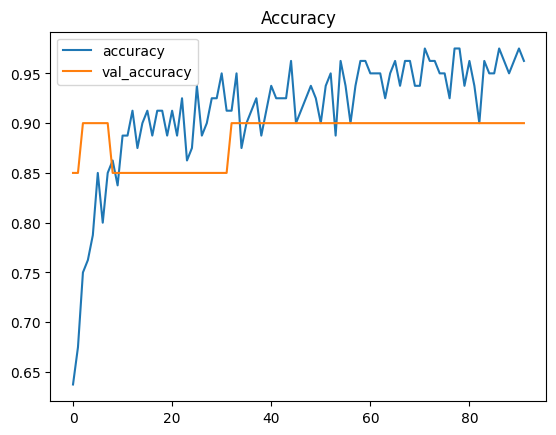

In [68]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
plt.show()

In [69]:
#Model Evaluation

In [70]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9000


In [71]:
#Confusion Matrix

In [72]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


<Axes: >

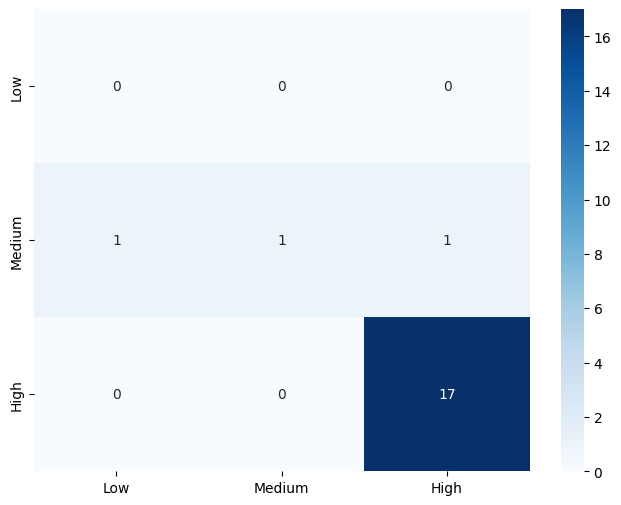

In [73]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])

Text(0.5, 0, 'Predicted Impact Level')

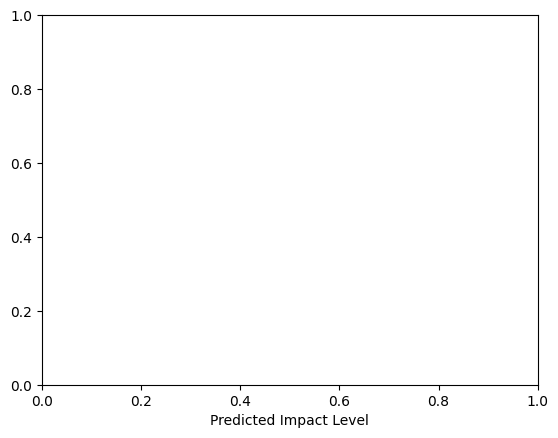

In [74]:
plt.xlabel('Predicted Impact Level')

Text(0, 0.5, 'True Impact Level')

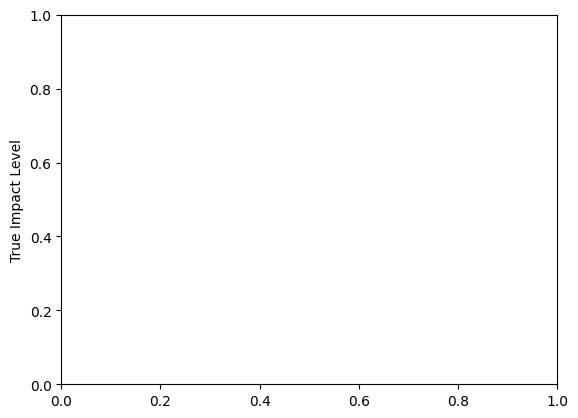

In [75]:
plt.ylabel('True Impact Level')

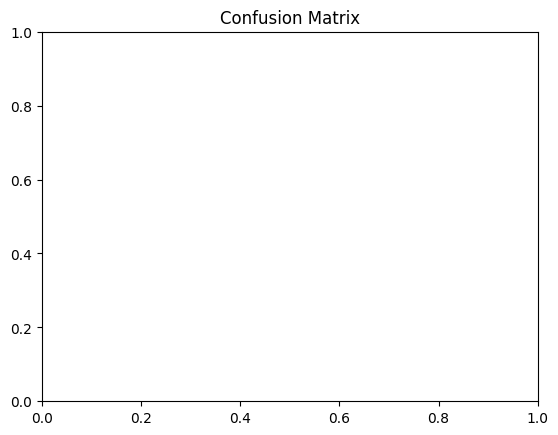

In [76]:
plt.title('Confusion Matrix')
plt.show()

In [77]:
#Classification Report

In [78]:
from sklearn.metrics import classification_report
print("\nClassification Report:")


Classification Report:


In [79]:
print(classification_report(y_test, y_pred_classes, target_names=['Low', 'Medium', 'High']))

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         0
      Medium       1.00      0.33      0.50         3
        High       0.94      1.00      0.97        17

    accuracy                           0.90        20
   macro avg       0.65      0.44      0.49        20
weighted avg       0.95      0.90      0.90        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
weights = model.layers[0].get_weights()[0]

In [81]:
importance = np.abs(weights).mean(axis=1)

In [82]:
feature_names = X.columns
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)


In [83]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-2020896475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


<Axes: xlabel='Importance', ylabel='Feature'>

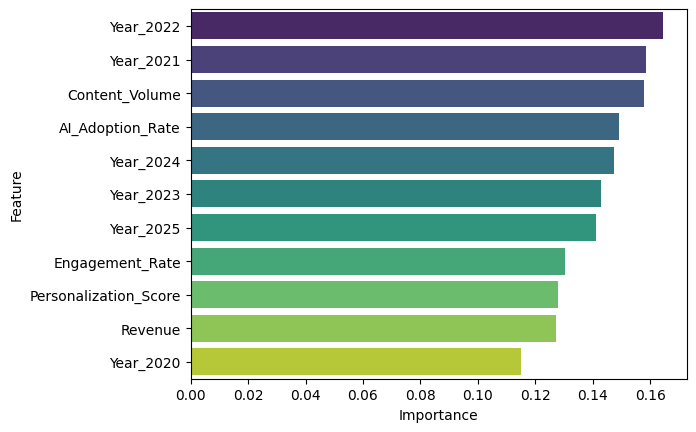

In [84]:
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')

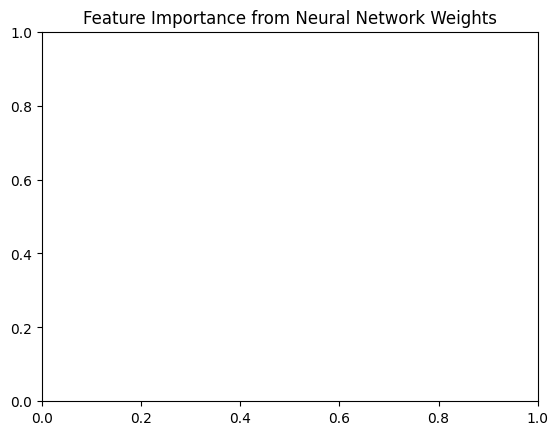

In [85]:
plt.title('Feature Importance from Neural Network Weights')
plt.show()